In [2]:
!pip install --upgrade gdown

In [3]:
!gdown 1GG1cC_oBTmRY3Sh6CJJNJea6FFKJYP0N

Downloading...
From: https://drive.google.com/uc?id=1GG1cC_oBTmRY3Sh6CJJNJea6FFKJYP0N
To: /kaggle/working/dogs-vs-cats-vvsmall.zip
100%|████████████████████████████████████████| 178M/178M [00:02<00:00, 62.9MB/s]


In [4]:
IMG_SIZE = 300
BATCH_SIZE = 32

In [5]:
import zipfile
import os

In [6]:
zip_ref = zipfile.ZipFile("dogs-vs-cats-vvsmall.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [7]:
base_dir = '/content/dogs-vs-cats-vvsmall'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

In [8]:
# Directory with our training horse pictures for training
train_cat_dir = os.path.join(train_dir,'cats')

# Directory with our training human pictures for training
train_dog_dir = os.path.join(train_dir,'dogs')

# Directory with our training horse pictures for validation
validation_cat_dir = os.path.join(validation_dir,'cats')

# Directory with our training human pictures for validation
validation_dog_dir = os.path.join(validation_dir,'dogs')

In [9]:
train_cat_names = os.listdir(train_cat_dir)
print(train_cat_names[:10])

train_dog_names = os.listdir(train_dog_dir)
print(train_dog_names[:10])

validation_cat_hames = os.listdir(validation_cat_dir)
print(validation_cat_hames[:10])

validation_dog_names = os.listdir(validation_dog_dir)
print(validation_dog_names[:10])

['cat.918.jpg', 'cat.1123.jpg', 'cat.535.jpg', 'cat.2941.jpg', 'cat.1374.jpg', 'cat.2829.jpg', 'cat.108.jpg', 'cat.1242.jpg', 'cat.2327.jpg', 'cat.2918.jpg']
['dog.890.jpg', 'dog.1178.jpg', 'dog.814.jpg', 'dog.2066.jpg', 'dog.1444.jpg', 'dog.1079.jpg', 'dog.1179.jpg', 'dog.1050.jpg', 'dog.1114.jpg', 'dog.1537.jpg']
['cat.8868.jpg', 'cat.9331.jpg', 'cat.9032.jpg', 'cat.9199.jpg', 'cat.8978.jpg', 'cat.9209.jpg', 'cat.9288.jpg', 'cat.8719.jpg', 'cat.8722.jpg', 'cat.8505.jpg']
['dog.8575.jpg', 'dog.8716.jpg', 'dog.9224.jpg', 'dog.8878.jpg', 'dog.8990.jpg', 'dog.9094.jpg', 'dog.9027.jpg', 'dog.8932.jpg', 'dog.8728.jpg', 'dog.8918.jpg']


In [10]:
print('total training horse images:', len(os.listdir(train_cat_dir)))
print('total training human images:', len(os.listdir(train_dog_dir)))
print('total validation horse images:', len(os.listdir(validation_cat_dir)))
print('total validation human images:', len(os.listdir(validation_dog_dir)))

total training horse images: 3000
total training human images: 3000
total validation horse images: 900
total validation human images: 900


In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

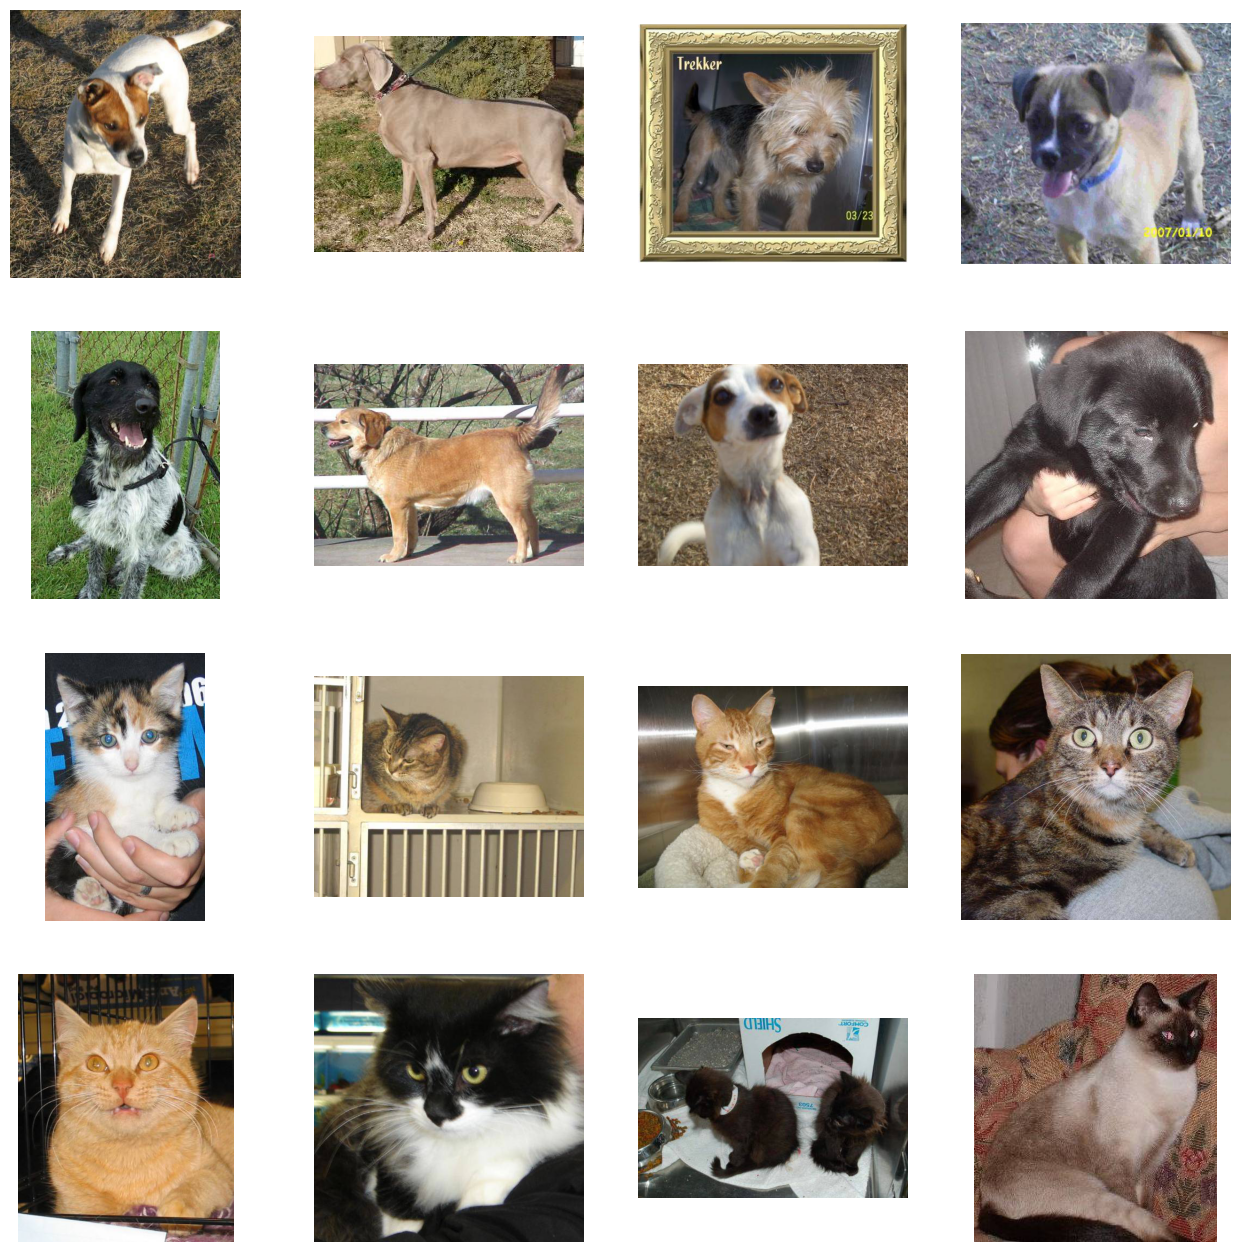

In [12]:
# display images from the dataset
nrows = 4
ncols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
# pick the first 8 horse pictures
#[print(e) for e in myList]
# for e in myList:
#    print(e)
next_horse_pix = [os.path.join(train_dog_dir, fname) for fname in train_dog_names[pic_index-8:pic_index]]

# pick the first 8 human pictures
next_human_pix = [os.path.join(train_cat_dir, fname) 
                for fname in train_cat_names[pic_index-8:pic_index]]

# add the horse and human pictures together in a list and plot in
# the specified number of rows and columns
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(brightness_range=[0.5, 1.5],
    rescale=1./255,   # rescale pixel values to [0,1]
    rotation_range=10,  # randomly rotate images by up to 20 degrees
    width_shift_range=0.1,  # randomly shift images horizontally by up to 10%
    height_shift_range=0.1,  # randomly shift images vertically by up to 10%
    shear_range=0.2,     # apply random shear transformation
    zoom_range=0.2,      # apply random zoom transformation
    horizontal_flip=True,  # randomly flip images horizontally
    fill_mode='reflect'      # Use reflection padding to avoid border artifacts
)

In [15]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,   # rescale pixel values to [0,1]
)

In [16]:
# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        r'/content/dogs-vs-cats-vvsmall/train',  # This is the source directory for training images
        target_size=(IMG_SIZE, IMG_SIZE),  # All images will be resized to 300x300
        batch_size=BATCH_SIZE,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 6000 images belonging to 2 classes.


In [17]:
# Flow training images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        r'/content/dogs-vs-cats-vvsmall/validation',  # This is the source directory for training images
        target_size=(IMG_SIZE, IMG_SIZE),  # All images will be resized to 300x300
        batch_size=BATCH_SIZE,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1800 images belonging to 2 classes.


In [18]:
import tensorflow as tf

In [19]:
from tensorflow import keras

In [20]:
from tensorflow.keras import layers

In [21]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [22]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [31]:
import tensorflow as tf
print(tf.test.is_gpu_available())
strategy = tf.distribute.MirroredStrategy()



True


In [33]:
with strategy.scope():
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1,activation='relu', padding='same', input_shape=(300,300,3)))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 150, 150, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 37, 37, 64)      

In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

True


In [35]:

history=model.fit( train_generator,  
                    validation_data = validation_generator,
                    epochs=15
                  )             

     

Epoch 1/15
188/188 [==============================] - 157s 818ms/step - loss: 0.6899 - accuracy: 0.5253 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/15
188/188 [==============================] - 154s 819ms/step - loss: 0.6933 - accuracy: 0.5005 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/15
188/188 [==============================] - 154s 818ms/step - loss: 0.6932 - accuracy: 0.5133 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 4/15
188/188 [==============================] - 153s 817ms/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/15
188/188 [==============================] - 153s 816ms/step - loss: 0.6932 - accuracy: 0.5030 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/15
188/188 [==============================] - 154s 820ms/step - loss: 0.6932 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/15
188/188 [==============================] - 154s 818ms/step - loss: 0.6932 - accuracy: 0.5065 - val_loss: 0.6930 -

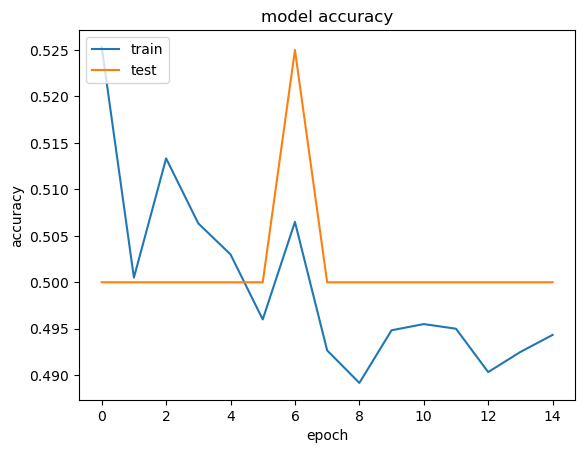

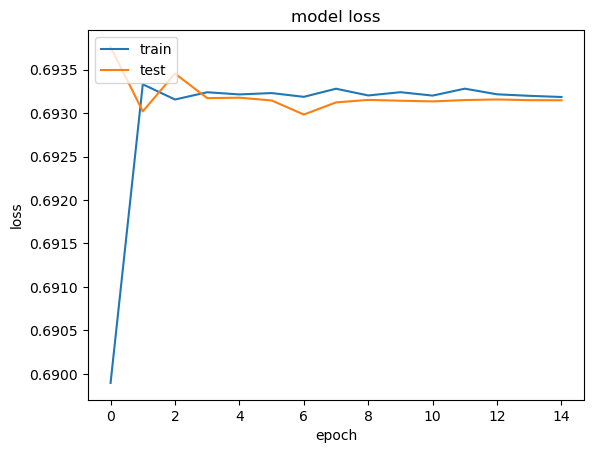

In [36]:

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

hyperparameter


In [37]:
from tensorflow.keras import layers

In [38]:
def build_model(hp):
    with strategy.scope():
        model = Sequential()

        pool_size = hp.Choice('pool_size', values=[2, 3])

        # Convolutional layers
        for i in range(hp.Int('num_conv_layers', 2, 4)):
            model.add(Conv2D(filters=hp.Int(f'conv_{i+1}_filter', 8, 128, step=4),
                             kernel_size=hp.Choice(f'conv_{i+1}_kernel', values=[2, 3, 4]),
                             activation='relu',
                             padding='same'))
            model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

        # Flatten the output layer
        model.add(Flatten())

        # Dense layers
        for i in range(hp.Int('num_dense_layers', 2, 4)):
            model.add(Dense(units=hp.Int(f'dense_{i+1}_units', 64, 256, step=4),
                            activation='relu'))
            hp_drop = hp.Float(f'dropout_{i+1}', 0.0, 0.5, step=0.1)
            model.add(layers.Dropout(rate=hp_drop))

        # Output layer
        model.add(Dense(units=1, activation='sigmoid'))

        # Compile the model
        model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        return model

In [39]:
!pip install --q keras_tuner

In [40]:
from kerastuner import RandomSearch

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [41]:
tuner = RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    
)

In [42]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True,mode='max')
reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(
                                                         monitor = "val_loss",
                                                         factor = 0.1,
                                                         patience = 3,
                                                         verbose = 0,
                                                         mode = "min"
                                                         )

In [43]:
import IPython
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)
     

In [44]:
tuner.search(train_generator,
             epochs=30,
             validation_data=validation_generator,
             steps_per_epoch=len(train_generator),
             validation_steps=50,callbacks = [ClearTrainingOutput(),early_stopping,reduce_lr_on_plateau])

Trial 10 Complete [00h 54m 42s]
val_accuracy: 0.7568749785423279

Best val_accuracy So Far: 0.8037499785423279
Total elapsed time: 07h 03m 55s


In [47]:

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f'pool size: {best_hps.get("pool_size")}')
print(f'num_conv_layers: {best_hps.get("num_conv_layers")}')
print(f'Optimal number of filter1: {best_hps.get("conv_1_filter")}')
print(f'Optimal kernel 1: {best_hps.get("conv_1_kernel")}')
print(f'Optimal number of filter2: {best_hps.get("conv_2_filter")}')
print(f'Optimal kernel2 : {best_hps.get("conv_2_kernel")}')
print(f'Optimal num of dense layers : {best_hps.get("num_dense_layers")}')
print(f'Optimal dense 1 : {best_hps.get("dense_1_units")}')
print(f'Optimal dropout 1: {best_hps.get("dropout_1")}')
print(f'Optimal dense 2 : {best_hps.get("dense_2_units")}')
print(f'Optimaldropout 2: {best_hps.get("dropout_2")}')
print(f'Optimal learning rate: {best_hps.get("learning_rate")}')


pool size: 3
num_conv_layers: 2
Optimal number of filter1: 64
Optimal kernel 1: 4
Optimal number of filter2: 100
Optimal kernel2 : 3
Optimal num of dense layers : 2
Optimal dense 1 : 104
Optimal dropout 1: 0.5
Optimal dense 2 : 100
Optimaldropout 2: 0.4
Optimal learning rate: 0.0001


In [ ]:
tf.debugging.set_log_device_placement(True)
history =model.fit( train_generator,  
                    validation_data = validation_generator,
                    epochs=15
                  )             


In [48]:
pool_size = 3
num_conv_layers = 2
num_filters1 = 64
kernel1 = 4
num_filters2 = 100
kernel2 = 2
num_dense_layers = 2
dense1_units = 104
dropout1 = 0.5
dense2_units = 100
dropout2 = 0.4
learning_rate = 0.0001


In [49]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [50]:
from tensorflow.keras.optimizers import Adam

In [51]:
model = Sequential()

# Add convolutional layers with optimal hyperparameters
model.add(Conv2D(filters=64, kernel_size=4, activation='relu', input_shape=(300, 300, 3)))
model.add(MaxPooling2D(pool_size=3))
model.add(Conv2D(filters=100, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=3))


# Flatten the output
model.add(Flatten())

# Add dense layers with optimal hyperparameters
model.add(Dense(units=104, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.4))


# Add output layer with sigmoid activation function
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with optimal learning rate
opt = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 297, 297, 64)      3136      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 98, 98, 100)       25700     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 100)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 102400)            0         
                                                                 
 dense_3 (Dense)             (None, 104)              

In [53]:
model.save("model.h5")

In [54]:
tf.debugging.set_log_device_placement(True)
history1 =model.fit( train_generator,  
                    validation_data = validation_generator,
                    epochs=30
                  )             


Epoch 1/30
188/188 [==============================] - 157s 819ms/step - loss: 0.7009 - accuracy: 0.5170 - val_loss: 0.6745 - val_accuracy: 0.6089
Epoch 2/30
188/188 [==============================] - 150s 799ms/step - loss: 0.6796 - accuracy: 0.5538 - val_loss: 0.6599 - val_accuracy: 0.6361
Epoch 3/30
188/188 [==============================] - 152s 811ms/step - loss: 0.6580 - accuracy: 0.6065 - val_loss: 0.6259 - val_accuracy: 0.6894
Epoch 4/30
188/188 [==============================] - 152s 810ms/step - loss: 0.6382 - accuracy: 0.6462 - val_loss: 0.5821 - val_accuracy: 0.7056
Epoch 5/30
188/188 [==============================] - 150s 800ms/step - loss: 0.6169 - accuracy: 0.6682 - val_loss: 0.5807 - val_accuracy: 0.7267
Epoch 6/30
188/188 [==============================] - 152s 811ms/step - loss: 0.6046 - accuracy: 0.6825 - val_loss: 0.5629 - val_accuracy: 0.7211
Epoch 7/30
188/188 [==============================] - 151s 803ms/step - loss: 0.5933 - accuracy: 0.6908 - val_loss: 0.5334 -

In [60]:
<a href="/kaggle/working/model.h5"> Download File </a>

SyntaxError: invalid syntax (2665461846.py, line 1)

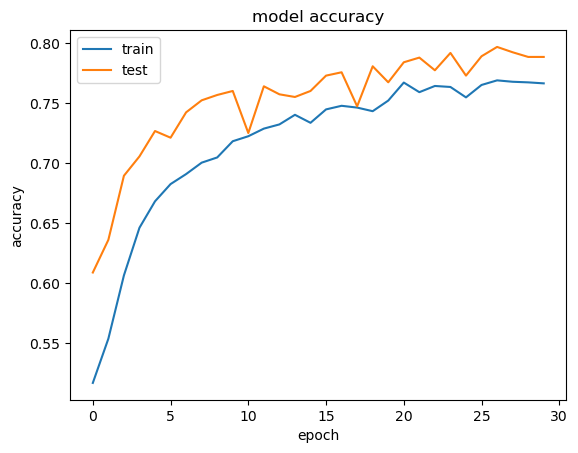

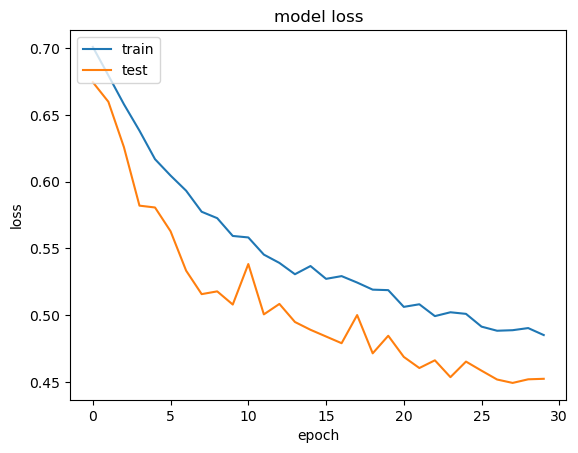

In [55]:
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [56]:
train_loss, train_acc = model.evaluate(train_generator)
val_loss, val_acc = model.evaluate(validation_generator)

print("Training accuracy:", train_acc)
print("Validation accuracy:", val_acc)

57/57 [==============================] - 9s 160ms/step - loss: 0.4524 - accuracy: 0.7883
Training accuracy: 0.7848333120346069
Validation accuracy: 0.7883333563804626


In [58]:
tf.debugging.set_log_device_placement(True)
history=model.fit( train_generator,  
                    validation_data = validation_generator,
                    epochs=30,callbacks = [ClearTrainingOutput(),early_stopping,reduce_lr_on_plateau]
                  )             


Epoch 1/30
188/188 [==============================] - 153s 811ms/step - loss: 0.4715 - accuracy: 0.7767 - val_loss: 0.4500 - val_accuracy: 0.7883 - lr: 1.0000e-04
Epoch 2/30
188/188 [==============================] - 151s 803ms/step - loss: 0.4670 - accuracy: 0.7797 - val_loss: 0.4344 - val_accuracy: 0.8056 - lr: 1.0000e-04
Epoch 3/30
188/188 [==============================] - 150s 799ms/step - loss: 0.4630 - accuracy: 0.7870 - val_loss: 0.4197 - val_accuracy: 0.8128 - lr: 1.0000e-04
Epoch 4/30
188/188 [==============================] - 151s 804ms/step - loss: 0.4653 - accuracy: 0.7832 - val_loss: 0.4204 - val_accuracy: 0.8083 - lr: 1.0000e-04
Epoch 5/30
188/188 [==============================] - 150s 800ms/step - loss: 0.4697 - accuracy: 0.7772 - val_loss: 0.4266 - val_accuracy: 0.8028 - lr: 1.0000e-04
Epoch 6/30
188/188 [==============================] - 155s 824ms/step - loss: 0.4618 - accuracy: 0.7822 - val_loss: 0.4306 - val_accuracy: 0.8039 - lr: 1.0000e-04


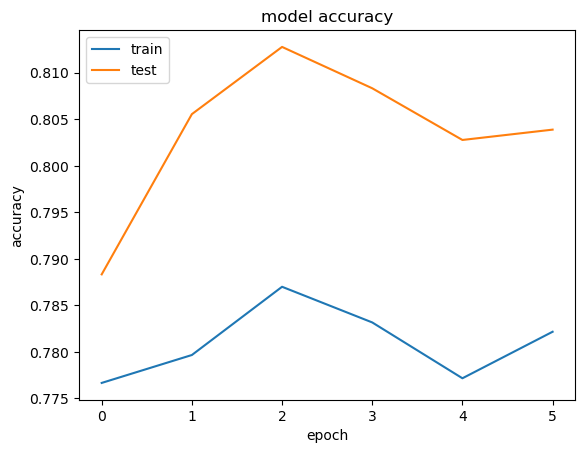

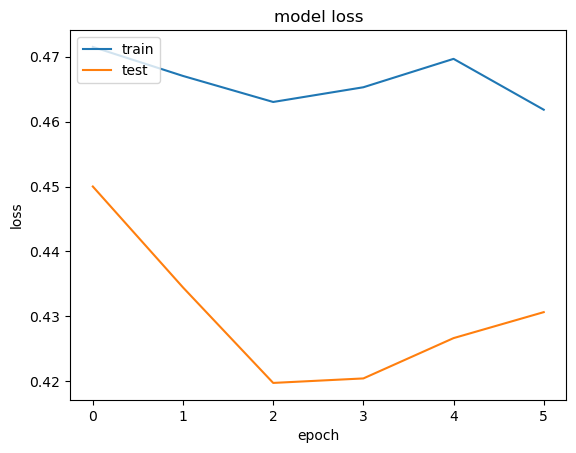

In [59]:
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
model.save('my_model.h5')

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f'Optimal number of units3: {best_hps.get("pool_size")}')
print(f'Optimal number of units3: {best_hps.get("num_conv_layers")}')
print(f'Optimal number of units1: {best_hps.get("conv_1_filter")}')
print(f'Optimal kernel: {best_hps.get("conv_1_kernel")}')
print(f'Optimal number of units2: {best_hps.get("conv_2_filter")}')
print(f'Optimal kernel: {best_hps.get("conv_2_kernel")}')
print(f'Optimal kernel: {best_hps.get("num_dense_layers")}')
print(f'Optimal dense 1 : {best_hps.get("dense_1_units")}')
print(f'Optimal kernel: {best_hps.get("dropout_1")}')
print(f'Optimal dense 1 : {best_hps.get("dense_2_units")}')
print(f'Optimal kernel: {best_hps.get("dropout_2")}')
print(f'Optimal learning rate: {best_hps.get("learning_rate")}')
print(f'Optimal number of units3: {best_hps.get("conv_3_filter")}')
print(f'Optimal kernel: {best_hps.get("conv_2_kernel")}')
print(f'Optimal dense 1 : {best_hps.get("dense_3_units")}')
print(f'Optimal kernel: {best_hps.get("dropout_3")}')